In [549]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_squared_error, r2_score
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns

### EDA

In [551]:
data=pd.read_csv('data/Automobile_data 1.csv')
data.head()

,index,company,body-style,wheel-base,length,engine-type,num-of-cylinders,horsepower,average-mileage,price
0,0,alfa-romero,convertible,88.6,168.8,dohc,four,111,21,13495.0
1,1,alfa-romero,convertible,88.6,168.8,dohc,four,111,21,16500.0
2,2,alfa-romero,hatchback,94.5,171.2,ohcv,six,154,19,16500.0
3,3,audi,sedan,99.8,176.6,ohc,four,102,24,13950.0
4,4,audi,sedan,99.4,176.6,ohc,five,115,18,17450.0


In [552]:
data.duplicated().sum()

0

In [553]:
data.isna().sum()

index               0
company             0
body-style          0
wheel-base          0
length              0
engine-type         0
num-of-cylinders    0
horsepower          0
average-mileage     0
price               3
dtype: int64

In [554]:
data['price'].fillna(data['price'].mean(), inplace=True)
print(data.isnull().sum())

index               0
company             0
body-style          0
wheel-base          0
length              0
engine-type         0
num-of-cylinders    0
horsepower          0
average-mileage     0
price               0
dtype: int64


### Label Encoding

In [556]:
encoder = LabelEncoder()
data['company'] = encoder.fit_transform(data['company'])
data['body-style'] = encoder.fit_transform(data['body-style'])
data['engine-type'] = encoder.fit_transform(data['engine-type'])
data['num-of-cylinders'] = encoder.fit_transform(data['num-of-cylinders'])


In [557]:
data.corr()

,index,company,body-style,wheel-base,length,engine-type,num-of-cylinders,horsepower,average-mileage,price
index,1.000000,0.989144,0.206128,0.013401,0.004828,0.086753,-0.074822,-0.093809,0.176037,-0.195768
company,0.989144,1.000000,0.171622,-0.005248,-0.027407,0.109381,-0.080565,-0.104871,0.193498,-0.203544
body-style,0.206128,0.171622,1.000000,0.420375,0.296047,0.046794,-0.077200,-0.168441,0.050702,-0.110204
wheel-base,0.013401,-0.005248,0.420375,1.000000,0.878381,0.025034,-0.226246,0.463421,-0.547325,0.659005
length,0.004828,-0.027407,0.296047,0.878381,1.000000,0.007572,-0.100920,0.668555,-0.788429,0.767611
engine-type,0.086753,0.109381,0.046794,0.025034,0.007572,1.000000,0.140743,0.026437,-0.059321,0.105284
num-of-cylinders,-0.074822,-0.080565,-0.077200,-0.226246,-0.100920,0.140743,1.000000,0.102580,-0.068593,0.051459
horsepower,-0.093809,-0.104871,-0.168441,0.463421,0.668555,0.026437,0.102580,1.000000,-0.808804,0.803195
average-mileage,0.176037,0.193498,0.050702,-0.547325,-0.788429,-0.059321,-0.068593,-0.808804,1.000000,-0.732467
price,-0.195768,-0.203544,-0.110204,0.659005,0.767611,0.105284,0.051459,0.803195,-0.732467,1.000000


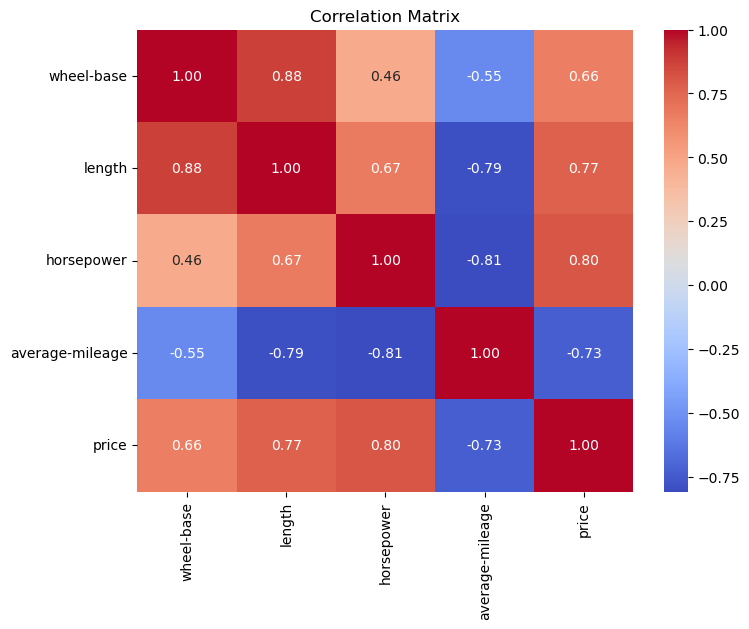

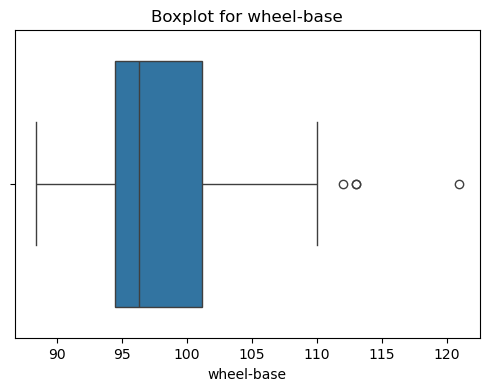

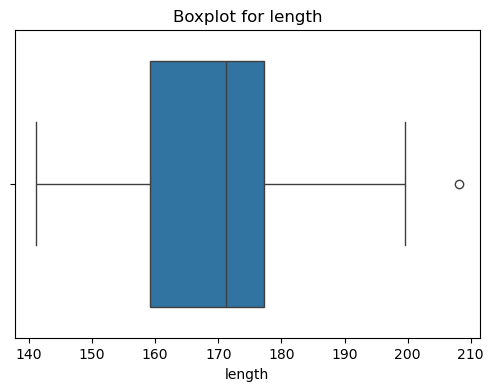

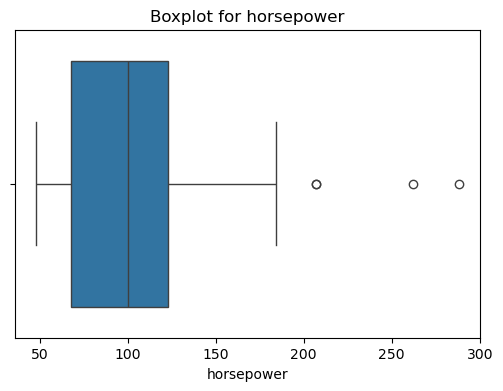

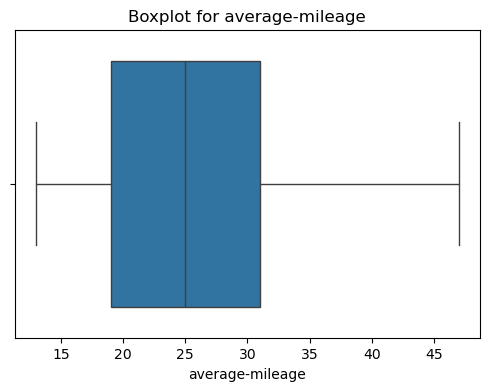

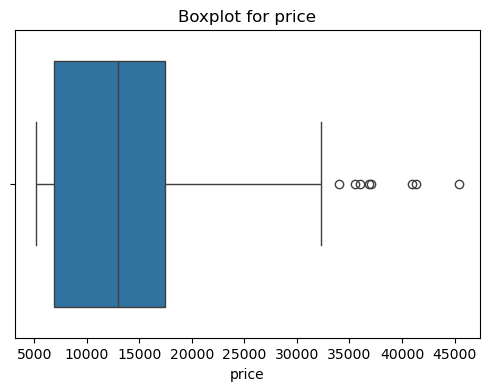

In [558]:
numeric_cols = ["wheel-base", "length", "horsepower", "average-mileage", "price"]
corr_matrix = data[numeric_cols].corr()

# Plotting correlation heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Matrix")
plt.show()

# Outlier detection using boxplots
for i in numeric_cols:
    plt.figure(figsize=(6, 4))
    sns.boxplot(x=data[i])
    plt.title(f"Boxplot for {i}")
    plt.show()

### Splitting X & Y

In [560]:
X = data[['company', 'body-style', 'wheel-base', 'length', 'engine-type', 'num-of-cylinders', 'horsepower', 'average-mileage']]
# X=data.drop(columns='price',axis=1)
Y = data['price']
X.head()

,company,body-style,wheel-base,length,engine-type,num-of-cylinders,horsepower,average-mileage
0,0,0,88.6,168.8,0,2,111,21
1,0,0,88.6,168.8,0,2,111,21
2,0,2,94.5,171.2,5,3,154,19
3,1,3,99.8,176.6,3,2,102,24
4,1,3,99.4,176.6,3,1,115,18


### Scaling

In [562]:
from sklearn.preprocessing import StandardScaler,MinMaxScaler
sd=StandardScaler()
X_fit=sd.fit_transform(X)
X_fit

array([[-1.68673167, -2.88207598, -1.49178429, -0.30909142, -2.56307297,
        -0.1544396 ,  0.05929375, -0.59572537],
       [-1.68673167, -2.88207598, -1.49178429, -0.30909142, -2.56307297,
        -0.1544396 ,  0.05929375, -0.59572537],
       [-1.68673167, -0.73809263, -0.60111879, -0.13650948,  1.77991179,
         0.89231769,  0.8693328 , -0.84377484],
       [-1.46828023,  0.33389905,  0.19897057,  0.25179988,  0.04271788,
        -0.1544396 , -0.11024931, -0.22365116],
       [-1.46828023,  0.33389905,  0.13858646,  0.25179988,  0.04271788,
        -1.20119689,  0.13464622, -0.96779958],
       [-1.46828023,  0.33389905,  0.19897057,  0.30213628,  0.04271788,
        -1.20119689,  0.04045563, -0.84377484],
       [-1.46828023,  1.40589072,  1.1047321 ,  1.40953705,  0.04271788,
        -1.20119689,  0.04045563, -0.84377484],
       [-1.24982878,  0.33389905,  0.41031492,  0.26618171,  0.04271788,
        -0.1544396 , -0.12908743, -0.3476759 ],
       [-1.24982878,  0.33389905

### Splitting train and test data

In [564]:
X_train, X_test, Y_train, Y_test = train_test_split(X_fit, Y, test_size=0.20, random_state=42)

### Linear Regression

In [566]:
model = LinearRegression()
model.fit(X_train, Y_train)

LinearRegression()

In [567]:
Y_pred = model.predict(X_test)

### Evaluate the model

In [569]:
print("R-squared:", r2_score(Y_test, Y_pred)*100)
print("Mean Squared Error:", mean_squared_error(Y_test, Y_pred))
print("Coefficients:", model.coef_)

R-squared: 83.92755458605046
Mean Squared Error: 25512955.063721802
Coefficients: [-1756.71885417 -2854.97577564  2532.67322616  6528.60575022
   967.90455858   896.11392638  4435.63874473  3162.62906312]


In [570]:
# END

### SVR - Linear

In [572]:
from sklearn.svm import SVR
linear_model=SVR(kernel='linear',C=700)
linear_model.fit(X_train,Y_train)
linear_model.score(X_test,Y_test)
y_pred_linear=linear_model.predict(X_test)
print(mean_squared_error(Y_test,y_pred_linear))
print(f"R-squared:{r2_score(Y_test,y_pred_linear)}")

52621103.78856305
R-squared:0.6685018195065656


In [573]:
from sklearn.svm import SVR
linear_model=SVR(kernel='linear',C=900)
linear_model.fit(X_train,Y_train)
print(linear_model.score(X_test,Y_test))
y_pred_linear=linear_model.predict(X_test)
print(mean_squared_error(Y_test,y_pred_linear))
print(f"R-squared:{r2_score(Y_test,y_pred_linear)}")

0.6860298345863516
49838755.181557104
R-squared:0.6860298345863516


### SVR - Poly

In [575]:
poly_model=SVR(kernel='poly',degree=5,C=700)
poly_model.fit(X_train,Y_train)
print(poly_model.score(X_test,Y_test))
y_pred_poly=poly_model.predict(X_test)
print(mean_squared_error(Y_test,y_pred_poly))
print(f"R-squared:{r2_score(Y_test,y_pred_poly)}")

-0.07801895482499033
171121745.5958483
R-squared:-0.07801895482499033


### SVM - Sigmoid

In [577]:
sigmoid_model=SVR(kernel='sigmoid',C=900)
sigmoid_model.fit(X_train,Y_train)
print(sigmoid_model.score(X_test,Y_test))
y_pred_sigmoid=sigmoid_model.predict(X_test)
print(mean_squared_error(Y_test,y_pred_sigmoid))
print(f"R-squared:{r2_score(Y_test,y_pred_sigmoid)}")

0.3297575559610084
106392430.74812132
R-squared:0.3297575559610084


In [578]:
#END